<a href="https://colab.research.google.com/github/styagi7/Capstone/blob/styagi/NLP_Automated_Ticket_Assignment_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Great Learning - Capstone Project - NLP | Automated Ticket Assignment
*  **Submitted By**: Gaurav, Karishma, Lavanya, Pallavi and Swati 
* **Status** : In-Progress (EDA, Feature Engineering & Selection)
* **Date of Submission** : TBD
* **Dataset** : https://drive.google.com/drive/u/0/folders/1xOCdNI2R5hiodskIJbj-QySMQs6ccehL

# Problem Statement
One of the key activities of any IT function is to ensure there is no impact to the Business operations through Incident Management process. An incident is an unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

These incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). 

**The goal of this project is to build a classifier that can classify the incidents by analysing text**.


# Solution
The solution is to build a classification model that can analyse the text and classify to appropriate Service Desk team.

# Approach


*   Analyse and Understand the structure of data
*   Visualize data
*   Text preprocessing
*   Create word vocabulary and Tokens
*   Build a Classification model
*   Train the model
*   Test the Model 

## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# changing present working directory
import os
os.chdir("/content/drive/My Drive/Capstone Project/")
os.getcwd()

'/content/drive/My Drive/Capstone Project'

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

#import DataPreprocessor as DP

from pprint import pprint
from sklearn import preprocessing 

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['received from', 'hi', 'hello','i','am','cc','sir','good morning','gentles','dear','kind','best','please',''])
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


#**## Reading and Exploring Data**

## Reading Data "Input Data Synthetic (created but not used in our project).xlsx". Exploring the data and getting some insights about the data.

In [5]:
# Read Dataset
file_name = "Ticket_Data.xlsx" 
df = pd.read_excel(file_name,encoding='cp1252')
df = df.rename(columns = {"Short description": "Short_description",
                          "Assignment group": "Group"})
DELETE_CALLER = False #True

df.head()

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [6]:
# Checking Shape of the data
print("Data shape:", df.shape)
print("Data Description:")
df.describe()

Data shape: (8500, 4)
Data Description:


,Short_description,Description,Caller,Group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [7]:
# Drop duplicate rows
df_v1 = df
df_v1 = df_v1.drop_duplicates(keep='first', inplace=False)
df_v1.shape

(8417, 4)

## Exploratory Data Analysis (EDA)


In [0]:
def wordCloudText(df_column):
  title = ("Most Frequent words in ") + df_column.name
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                        max_font_size=40, random_state=42).generate(str(df_column.values.tolist()))
  print(wordcloud)
  fig = plt.figure(1,figsize = (20, 8))
  plt.imshow(wordcloud)
  plt.title(title ,fontsize=30)
  plt.axis('off')
  plt.show()

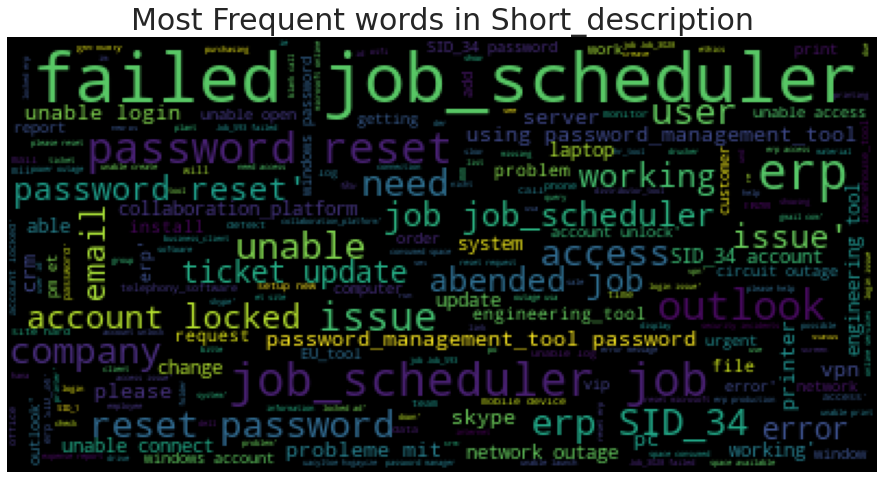

In [9]:
wordCloudText(df.Short_description)

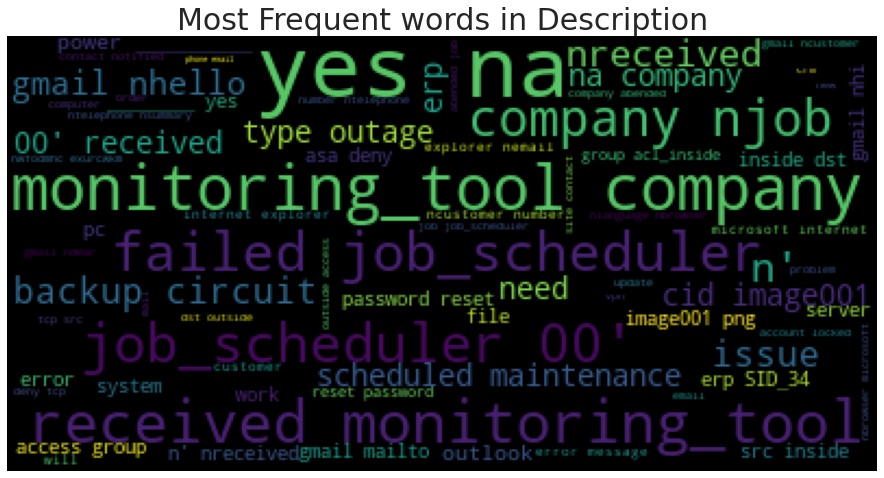

In [10]:
wordCloudText(df.Description)

## Drop "Caller" column based on flag set by DELETE_CALLER. It seems to be anonymised data (usernames/ids). 

In [11]:
if DELETE_CALLER:
  df_v1 = df.drop('Caller',axis=1)
else:
    df_v1 = df.copy()
df_v1.head(20)

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [12]:
# Fetch rows with same data in "Short_description" & "Description"
df_v1[df_v1['Short_description'] == df_v1['Description']].count()

Short_description    2862
Description          2862
Caller               2862
Group                2862
dtype: int64

## Finding & Imputing Null values in Short Description & Description columns

In [13]:
# Check for number of null values in each columns
print("Total Null Values in data:", df_v1.isnull().sum().sum())
print("\nNull Values accross columns:\n", df_v1.isnull().sum())
print("\nData with 'Null' Short Description")
df_v1.loc[df_v1['Short_description'].isnull()==True]

Total Null Values in data: 9

Null Values accross columns:
 Short_description    8
Description          1
Caller               0
Group                0
dtype: int64

Data with 'Null' Short Description


,Short_description,Description,Caller,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [14]:
print("\nData with 'Null' Description")
df_v1.loc[df_v1['Description'].isnull()==True]


Data with 'Null' Description


,Short_description,Description,Caller,Group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [15]:
# Impute missing values
df_v1['Short_description'].fillna('the', inplace=True) # replacing null values with stopword 'the'
df_v1['Description'].fillna('the', inplace=True) # replacing null values with stopword 'the'

print("Null values imputed")
print("Null Values in data after imputation:", df_v1.isnull().sum().sum())

Null values imputed
Null Values in data after imputation: 0


## For "Assignment Group" type where number of tickets in the category is less than specified freuency, we will mark then into "GRP_Manual". All "GRP_Manual" tickets should be triaged manually, until the model has enough data to categorise them automatically.

In [16]:
# Reset Assignment Group for group types with less data
Frequency_Threshold = 50 #5
count = df_v1['Group'].value_counts(ascending=True)
idx = count[count.lt(Frequency_Threshold)].index
df_v1.loc[df_v1['Group'].isin(idx), 'Group'] = 'GRP_Manual'
print("Updated unique group types",df_v1['Group'].nunique())
df_v1['Group'].value_counts(ascending=True)


Updated unique group types 25


GRP_26          56
GRP_34          62
GRP_7           68
GRP_31          69
GRP_17          81
GRP_16          85
GRP_18          88
GRP_29          97
GRP_4          100
GRP_33         107
GRP_25         116
GRP_14         118
GRP_5          129
GRP_10         140
GRP_13         145
GRP_6          184
GRP_3          200
GRP_19         215
GRP_2          241
GRP_9          252
GRP_12         257
GRP_24         289
GRP_8          661
GRP_Manual     764
GRP_0         3976
Name: Group, dtype: int64

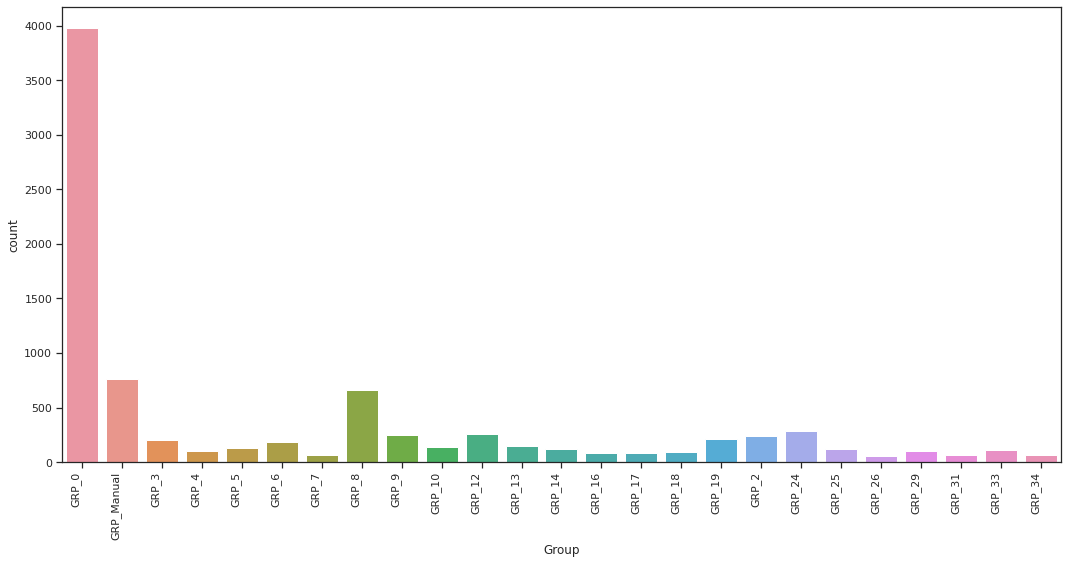

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x="Group", data=df_v1)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Visualisations

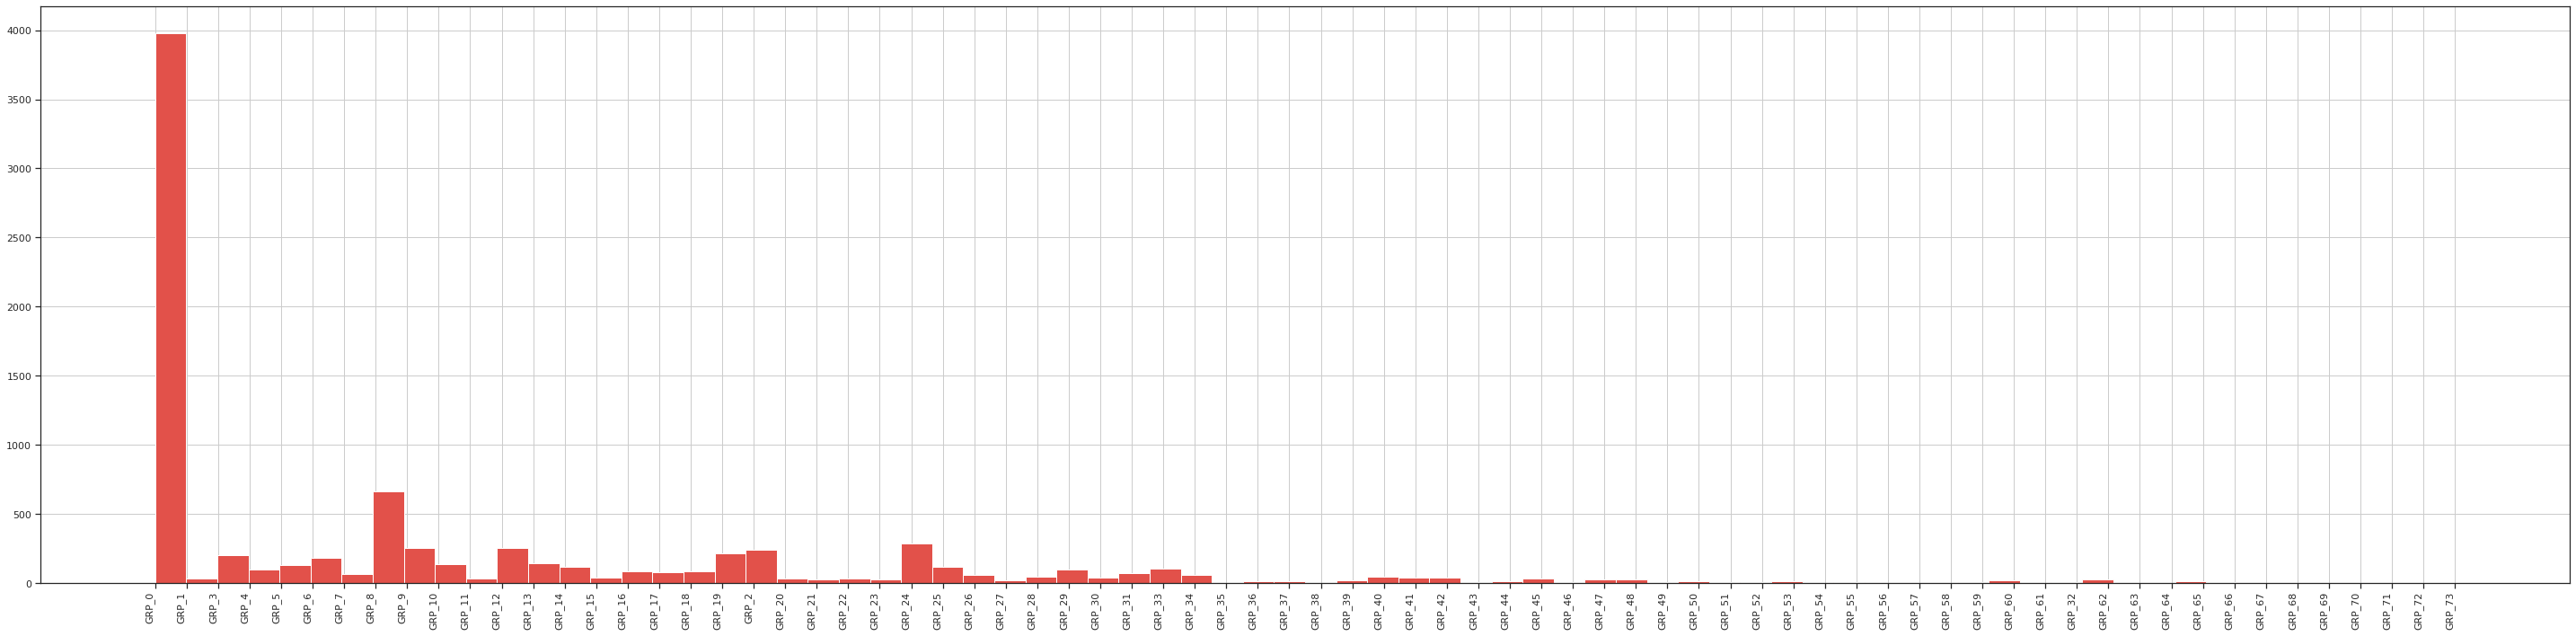

In [18]:
# Checking the distribution of groups
df['Group'].hist(figsize=(40,10),bins=74)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [19]:
#Creating dataframe of Groups on the basis of their value counts
n_grp = list(df['Group'].value_counts())
grp_name = list(df['Group'].value_counts().index)

grp = pd.DataFrame(data=grp_name,columns=['grp_name'])
grp['n_grp'] = n_grp
print(len(grp['n_grp']))
print(grp.head())

74
  grp_name  n_grp
0    GRP_0   3976
1    GRP_8    661
2   GRP_24    289
3   GRP_12    257
4    GRP_9    252


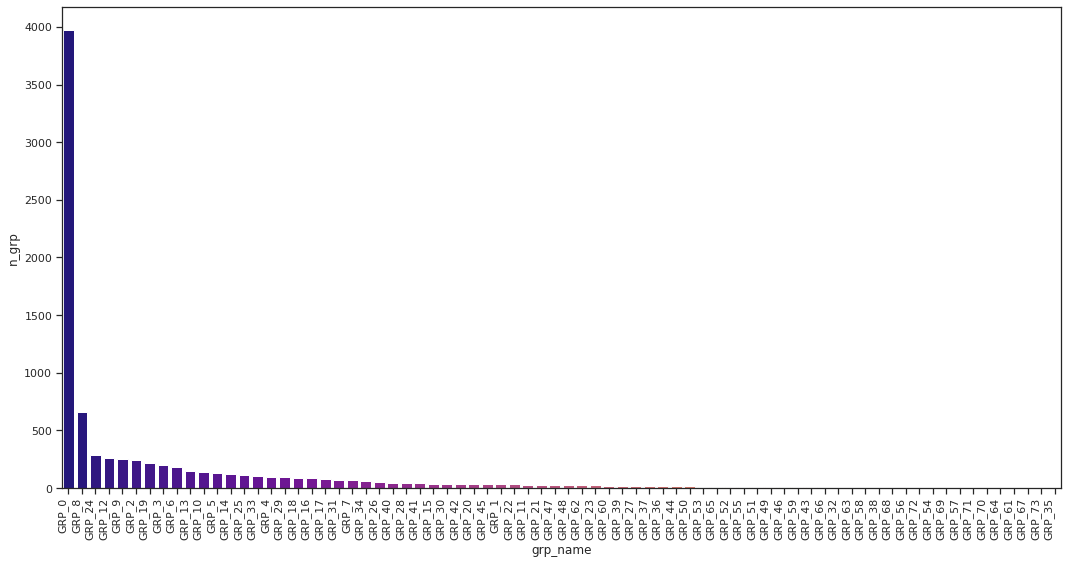

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="grp_name", y="n_grp", data=grp,palette='plasma')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [21]:
fig = px.pie(grp,values='n_grp', names='grp_name')
fig.show()

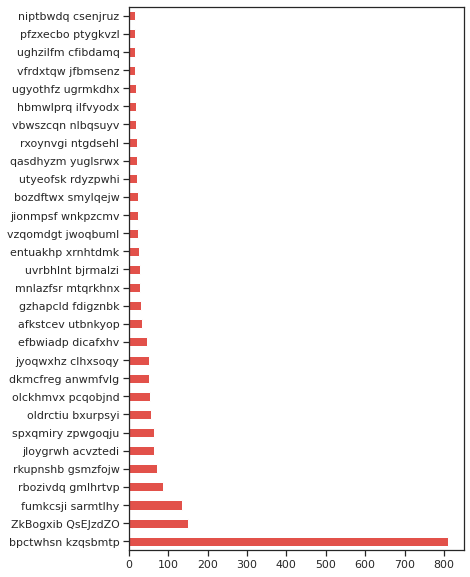

In [22]:
#Visualizing some of the Caller data with anonymous names
plt.figure(figsize=(20, 10))
df['Caller'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [23]:
caller_data=pd.DataFrame(df['Caller'].value_counts().to_frame()).T
caller_data

,bpctwhsn kzqsbmtp,ZkBogxib QsEJzdZO,fumkcsji sarmtlhy,rbozivdq gmlhrtvp,rkupnshb gsmzfojw,jloygrwh acvztedi,spxqmiry zpwgoqju,oldrctiu bxurpsyi,olckhmvx pcqobjnd,dkmcfreg anwmfvlg,jyoqwxhz clhxsoqy,efbwiadp dicafxhv,afkstcev utbnkyop,gzhapcld fdigznbk,mnlazfsr mtqrkhnx,uvrbhlnt bjrmalzi,entuakhp xrnhtdmk,vzqomdgt jwoqbuml,jionmpsf wnkpzcmv,bozdftwx smylqejw,utyeofsk rdyzpwhi,qasdhyzm yuglsrwx,rxoynvgi ntgdsehl,vbwszcqn nlbqsuyv,hbmwlprq ilfvyodx,ugyothfz ugrmkdhx,vfrdxtqw jfbmsenz,ughzilfm cfibdamq,pfzxecbo ptygkvzl,niptbwdq csenjruz,mfeyouli ndobtzpw,uxgrdjfc kqxdjeov,xwirzvda okhyipgr,ctvaejbo mjcerqwo,obanjrhg rnafleys,aorthyme rnsuipbk,tqfnalpj qyoscnge,wktesmbp lorjymef,kbnfxpsy gehxzayq,zuxcfonv nyhpkrbe,...,ybjgecfx nxzuseac,rsgqbuln pevsanuf,jvxmzteb vsdcnfyr,dyqekzuc djhznybt,sbgfycot quhzgatm,ajzycbnu ntfvpsqu,jevckify sbnohwiv,wcrbmgon kcudbnrw,nmqgrkex ldeizfrm,aedzqlvj mkosyxgh,gxvhauic zogmauli,dbroehva dgcyvxhw,myzprshf ojvgdcwb,zfhqxjms ztfcobhy,nizholae bjnqikym,ydgasebx ceuyrjhs,orjcgtyz worylufs,kiduhltr ofrdvnux,ivdntecr cdasfpjb,ctxwsvam vwgpjauf,rjlnszei kneatvfu,ckgwemna cgnziqxj,pfzljgwa wqdficxk,seyhanlk nuazwxgq,zmybfdqg cbwknmps,lfcwmxap ehodblur,ilhcgoqf xlibynvc,btuqmzvs wscahikd,qwynjdbk eamnvwyh,ujzhflpn oibnxrvq,vcnjqfta islabdft,expmsvyc thsruydf,rzxfgmcu xprwayoc,sthqwdpj lpnigfyq,xbsckemt durnfyxb,edspmloy fxnkzaqu,hmrtxkfb otykaqpc,dgmpqzev aucvxzyp,svnptdwu zopxaqib,yxwniljk doveqpsy
Caller,810,151,134,87,71,64,63,57,54,51,51,45,32,30,28,27,25,24,24,23,21,21,21,19,17,17,16,16,16,16,15,15,14,14,13,13,13,13,12,12,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
#Creating dataframe of callers on the basis of their frequency of calling
n_caller = list(df['Caller'].value_counts())
caller = list(df['Caller'].value_counts().index)

data = pd.DataFrame(data=caller,columns=['caller'])
data['n_caller'] = n_caller
len(data['caller'])

2950

In [25]:
#Since caller column contains anonymous data, assigning name Caller1, Caller2,..... for better visualization 
count = 0
new_caller = []
while count != len(data):
    new_caller.append('Caller'+''+ str(count+1))
    count = count +1
data['caller'] = new_caller
data = data.head(20)
data.head(10)

,caller,n_caller
0,Caller1,810
1,Caller2,151
2,Caller3,134
3,Caller4,87
4,Caller5,71
5,Caller6,64
6,Caller7,63
7,Caller8,57
8,Caller9,54
9,Caller10,51


In [26]:
#top 20 callers
fig = px.bar(data, x='caller', y='n_caller',hover_data=['n_caller'])
fig.show()

## Text Cleaning

In [0]:
import string 
import re

# Function for Text Cleaning with regex. Pass the column
def text_preprocessing(df_column):
  data = df_column.values.tolist() # Convert to list
  temp = []
  for sentence in data:
      sentence = sentence.replace("select the following link to view the disclaimer in an alternate language", '')  # remove disclaimer text      
      sentence = re.sub(r"\[(.*?)\]"," ", sentence)  # remove text in []
      sentence = re.sub(r"\((.*?)\)"," ", sentence)  # remove text in ()
      sentence = re.sub(r"[[h][t][t][p][\S]+|[w][w][w][\S]+|[\S]+[@][\S]+"," ", sentence)  # remove email addresses, web address and urls
      sentence = re.sub(r"[\S]+[\d]+[\S]+"," ", sentence) # remove alphanumerics and numerics (dates, time, request id etc.)
      sentence = re.sub(r"\W(?<!['. ])"," ", sentence)  # remove all non words with negative look back except ('. spaces) 
      sentence = re.sub(r"[^a-zA-z.| ]+"," ", sentence) # remove non-alphabetic text
      sentence = re.sub(r"[\_]+"," ", sentence) # remove underscores
      sentence = re.sub(r"[\s]+"," ", sentence) # replace multiple spaces with single space
      sentence = sentence.strip('\n')
      sentence = sentence.lower()
      temp.append(sentence)
  return(temp)

In [28]:
# Cleaned both - 'Short_Description & Description'
# df_v1.Short_description = DP.text_preprocessing(df_v1.Short_description)
# df_v1.Description = DP.text_preprocessing(df_v1.Description)
# df_v1.head()

df_v1.Short_description = text_preprocessing(df_v1.Short_description)
df_v1.Description = text_preprocessing(df_v1.Description)
df_v1.head()

,Short_description,Description,Caller,Group
0,login issue,verified user details. checked the user name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## Concatenating "Short Description" and "Description" to get "Summary" Tickets

In [29]:
df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ")
df_v2 = df_v1.copy()
df_v2 = df_v1.drop(['Short_description','Description'],axis=1)
df_v2.head(20) 

,Caller,Group,Summary
0,spxjnwir pjlcoqds,GRP_0,login issue. verified user details. checked t...
1,hmjdrvpb komuaywn,GRP_0,outlook. received from hello team my meetings...
2,eylqgodm ybqkwiam,GRP_0,cant log in to vpn. received from hi i cannot...
3,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page. unable to acces...
4,owlgqjme qhcozdfx,GRP_0,skype error . skype error
5,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...
6,jyoqwxhz clhxsoqy,GRP_Manual,event the value of mountpoint threshold for . ...
7,eqzibjhw ymebpoih,GRP_0,employment status new non employee . employm...
8,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook. unable t...
9,fumkcsji sarmtlhy,GRP_0,ticket update on . ticket update on


## Word cloud generated for the Cleant data in Summary Column

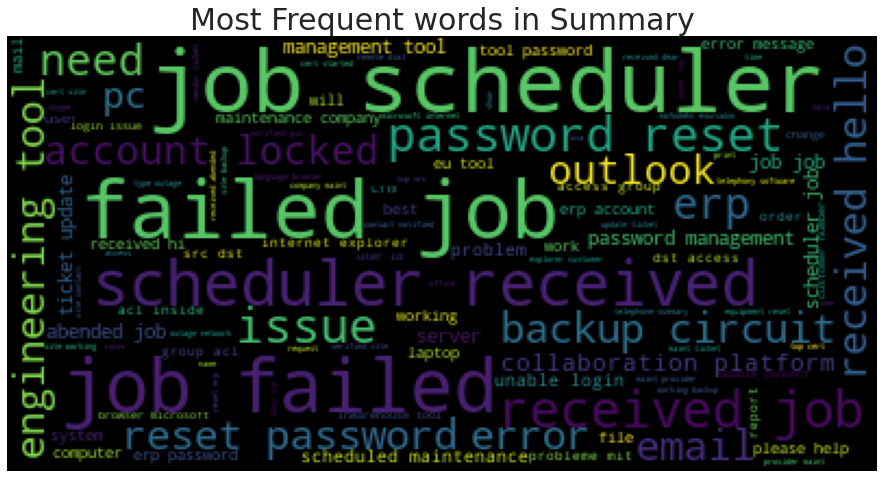

In [30]:
wordCloudText(df_v2.Summary)

In [31]:
# # word tokenisation & removal of stop words & gibberish word(by typos, anonymised names)

# Remove stopwords
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove words not in Englsih Dictionary (typos, anonymised names)
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))

# Tokenise 'Summary' column
data = df_v2.Summary.values.tolist()

data = [list(tokenize(sentences)) for sentences in data]

token_data = data

# Remove duplicates
# data = [list(words) for words in {set(sentence) for sentence in data}]
# temp = []
# for eachrow in data:
#     result = []
#     orderedset = set()
#     for eachword in eachrow:
#         if eachword not in orderedset:
#               orderedset = list(set(list1)) 
#               orderedset.append
#         result.append(eachword)
#     temp.append(result)


# lemmetise words
wordnet_lemmatizer = WordNetLemmatizer()
temp = []
for eachrow in data:
    lemma_words = []
    for eachword in eachrow:
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "n")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "v")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = ("a"))
        lemma_words.append(eachword)
    temp.append(lemma_words)

# temp   

data = temp 

data = [(" ".join(sentence))  for sentence in data]

data
#token_data


['login user check user name ad reset advise user login caller confirm able issue',
 'receive team outlook calendar somebody advise correct',
 'cant log receive cannot log',
 'unable access tool unable access tool page',
 'error error',
 'unable log engineer tool unable log engineer tool',
 'event value threshold event value threshold',
 'employment status new non employee employment status new non employee',
 'unable disable add unable disable add outlook',
 'ticket update ticket update',
 'engineer tool connect unable submit engineer tool connect unable submit',
 'tool site load page tool site load page correctly',
 'unable login tool unable login tool',
 'user reset user reset password',
 'unable open unable open',
 'ticket update ticket update',
 'unable login company receive unable login company try open new session link able get help urgently work home tomorrow due month end',
 'screen come screen come back',
 'account account lock',
 'unable sign unable sign',
 'unable check una

In [0]:
#token_data

In [0]:
maxlen = 0
for sentence in data:
    if (maxlen < sentence.count(' ')+1 ):
        maxlen = sentence.count(' ')+1

    
# Create Weighted Word Vectors
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db = tfidf_vectors.fit_transform(data).toarray()
tfidf_db = pd.DataFrame(tfidf_db)

In [34]:
tfidf_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366
0,0.214291,0.00000,0.0,0.0,0.0,0.0,0.0,0.286802,0.0,0.0,0.0,0.278404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.551876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.530371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.54983,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.501398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498599,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
data

['login user check user name ad reset advise user login caller confirm able issue',
 'receive team outlook calendar somebody advise correct',
 'cant log receive cannot log',
 'unable access tool unable access tool page',
 'error error',
 'unable log engineer tool unable log engineer tool',
 'event value threshold event value threshold',
 'employment status new non employee employment status new non employee',
 'unable disable add unable disable add outlook',
 'ticket update ticket update',
 'engineer tool connect unable submit engineer tool connect unable submit',
 'tool site load page tool site load page correctly',
 'unable login tool unable login tool',
 'user reset user reset password',
 'unable open unable open',
 'ticket update ticket update',
 'unable login company receive unable login company try open new session link able get help urgently work home tomorrow due month end',
 'screen come screen come back',
 'account account lock',
 'unable sign unable sign',
 'unable check una

In [36]:
le = preprocessing.LabelEncoder() 
df_v2['Group']= le.fit_transform(df_v2['Group']) # LabelEncode 'Groups'
df_v2.head(20) 

,Caller,Group,Summary
0,spxjnwir pjlcoqds,0,login user checked user name ad reset advised ...
1,hmjdrvpb komuaywn,0,received team outlook calendar somebody advise...
2,eylqgodm ybqkwiam,0,cant log received cannot log
3,xbkucsvz gcpydteq,0,unable access tool unable access tool page
4,owlgqjme qhcozdfx,0,error error
5,eflahbxn ltdgrvkz,0,unable log engineering tool unable log enginee...
6,jyoqwxhz clhxsoqy,24,event value threshold event value threshold
7,eqzibjhw ymebpoih,0,employment status new non employee employment ...
8,mdbegvct dbvichlg,0,unable disable add unable disable add outlook
9,fumkcsji sarmtlhy,0,ticket update ticket update


<b>Support Vector Machine (SVM) </b> creates a hyperplane between the classes which acts as decision boundary for each class. Data falling within these boundaries will belong to that particular class.
SVM can classify non-linear data and can capture complex relationships between data points without having to perform difficult transformations. While Naïve Bayes treats the features of dataset as independent, SVM analyses the interactions between each feature to certain degree using Radial Basis Function (RBF)

<b>Pros:</b> 
	less affected by outliers, relatively computationally efficient and accurate than its competitors.
	effective where number of features are greater than the number of samples.
	has good generalization capabilities which prevents it from over-fitting

<b>Cons: </b>
	does not perform very well when the data of target classes are overlapping.
	choosing an appropriate Kernel function for handling the non-linear data could be tricky and complex
	requires lot of memory size to store all support vectors and takes long time to train on larger dataset


In [48]:
# Creating SVC Model
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score

X = tfidf_db
y = df_v2['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

svm_model = SVC(kernel='linear',C=10)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print('Training Accuracy:', 100*svm_model.score(X_train , y_train))
print('Test Accuracy:',100*svm_model.score(X_test , y_test))


Training Accuracy: 78.17647058823529
Test Accuracy: 60.029411764705884


In [56]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))


Precision Score: 0.5481669672064655
Recall Score: 0.6002941176470589
F1 Score: 0.6583876015127572
[[1427    1    7    4    6    4    8    3    6   10    6    4    3    0
    12    3    3    3    1    0    2    6    1    2   28]
 [  14   24    0    0    1    0    0    0    0    2    0    0    0    0
     1    0    1    0    0    0    0    0    8    0    6]
 [  24    0   40    0    6    1    0    0    0    2    1    0    0    0
     0    0    0    3    2    0    0    0    6    0    7]
 [  24    3    0   15    0    0    0    2    0    0    0    0    2    1
     0    0    0    0    0    0    3    0    1    0    6]
 [  14    0    7    0   11    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    3    1    6]
 [  26    0    2    0    0   10    0    0    0    1    0    1    0    1
     0    0    0    0    0    0    0    0    0    0    1]
 [   4    0    0    0    0    0   31    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

<b>Naive Bayes </b> is a Probablistic learning algorithm derived from Bayes Theorm. Naive Bayes Model is considered to be extremely fast, reliable, and has stable classification ability relative to other classification algorithms. The algorithm is based on the assumption that each feature in independent of each other while predicting the classification.

<b>Pros:</b>
Simple, fast and well in multi class prediction
Performs better with less training data as it assumes feature independence

<b> Cons:</b>
bad estimator hence the probability outputs are not taken too seriously
Assumptions of independent feature cannot represent real time data
Zero frequency - If training data set gets a category not trained on earlier, then model will assign a 0 (zero) probability and will be unable to make a prediction.  

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification), we will build Multinomial Naive Bayes model for our dataset.

In [54]:
# We will use multinomialNB for this dataset
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_score, recall_score
NBModel = MultinomialNB(alpha = 0.001)
NBModel.fit(X_train, y_train)
NB_y_pred = NBModel.predict(X_test)
print('NB Training Accuracy:', 100*NBModel.score(X_train , y_train))
print('NB Test Accuracy:', 100*NBModel.score(X_test , y_test))

NB Training Accuracy: 67.29411764705883
NB Test Accuracy: 58.735294117647065


In [55]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(NB_y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(metrics.confusion_matrix(y_test,NB_y_pred))
print(metrics.classification_report(y_test,NB_y_pred))

Precision Score: 0.5873529411764706
Recall Score: 0.5873529411764706
F1 Score: 0.6697032221054285
[[1487    0    2    1    2    5    5    0    6    0    7    0    1    0
     1    0    4    0    0    0    2    2    2    0   23]
 [  20   16    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    8    3   10]
 [  35    0   34    0    5    0    0    0    0    2    1    0    0    0
     0    0    0    2    0    0    0    0    6    0    7]
 [  24    0    0   11    0    0    0    1    0    1    0    0    0    1
     0    0    0    0    0    0    3    0    1    0   15]
 [  26    0    4    0    6    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    5]
 [  37    0    0    0    0    2    0    0    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    2]
 [   7    0    0    0    0    0   28    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

We can see that the Training accuracy is 67% and testing accuracy is 58% with Naive Bayes Mode. The model is able to predict True Positives and False Negatives equally.

In [63]:
# Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
y_predict = dt_model.predict(X_test)
print('Training Accuracy:',100*dt_model.score(X_train, y_train))
print('Test Accuracy:',100*dt_model.score(X_test , y_test))

Training Accuracy: 88.29411764705883
Test Accuracy: 53.970588235294116


In [65]:
print ('Precision Score:', precision_score(y_test, y_predict, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_predict, pos_label='Positive', average='weighted'))

F1score = f1_score(y_predict, y_test, average='weighted')
print('F1 Score:', F1score)
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))

Precision Score: 0.4853194149941848
Recall Score: 0.5397058823529411
F1 Score: 0.5778675867829679
[[1248    5   18    9    4    9    4    3   23   29   54    6    6    6
    20    7    8    4    6    0    2    5    2    6   66]
 [  18   18    0    2    0    0    0    0    0    1    1    0    0    0
     1    0    0    0    0    0    1    0    8    1    6]
 [  24    0   31    0    4    0    0    0    2    1    4    0    0    0
     1    0    0    1    0    0    0    0    7    1   16]
 [  24    2    1    5    2    0    0    0    0    0    2    0    0    1
     0    0    0    0    0    0    5    1    1    3   10]
 [  15    2    3    1    8    1    0    0    0    1    1    0    0    0
     0    0    0    0    0    0    0    0    6    1    4]
 [  20    0    1    1    0    9    0    0    0    2    0    0    0    0
     1    0    0    0    1    0    0    0    0    1    6]
 [   7    0    0    0    0    0   28    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

In [66]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
print('Training Accuracy:', 100*rfcl.score(X_train , y_train))
print('Test Accuracy:',100*rfcl.score(X_test , y_test))

Training Accuracy: 88.29411764705883
Test Accuracy: 59.35294117647059


In [67]:
print ('Precision Score:', precision_score(y_test, test_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, test_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(test_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(metrics.confusion_matrix(y_test,test_pred))
print(metrics.classification_report(y_test,test_pred))

Precision Score: 0.5451418333947825
Recall Score: 0.5935294117647059
F1 Score: 0.6762291195123756
[[1470    0    4    1    1    1    2    0    3    1   41    2    0    0
     3    6    1    1    0    0    0    1    0    0   12]
 [  26   17    0    0    0    0    0    0    0    0    1    0    0    0
     1    0    0    0    0    0    0    0    8    0    4]
 [  40    0   30    0    3    0    0    0    2    1    2    0    0    0
     0    0    0    1    0    0    0    0    7    1    5]
 [  40    0    0    6    0    0    0    0    0    0    1    0    0    2
     0    0    0    0    0    0    1    0    1    0    6]
 [  22    0    4    0   10    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    4    0    3]
 [  40    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    1]
 [   7    0    0    0    0    0   28    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

In [68]:
# Bagging Ensemble for Classifying tickets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)
    
    print ("Mean of: {1:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean()))

Mean of: 0.494 [Bagging RandomForestClassifier]

Mean of: 0.494 [Bagging ExtraTreesClassifier]

Mean of: 0.495 [Bagging KNeighborsClassifier]

Mean of: 0.493 [Bagging SVC]

Mean of: 0.476 [Bagging RidgeClassifier]



In [69]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), 
                                    ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 
                                                     'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.61 (+/- 0.02) [Random Forest]
Accuracy: 0.61 (+/- 0.01) [Extra Trees]
Accuracy: 0.58 (+/- 0.02) [KNeighbors]
Accuracy: 0.61 (+/- 0.01) [SVC]
Accuracy: 0.61 (+/- 0.02) [Ridge Classifier]
Accuracy: 0.62 (+/- 0.01) [Ensemble]


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Mean: {0:.3f} of [{1}]".format(scores.mean(), label))

Mean: 0.535 of [Ada Boost]
